In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
import copy

from interpolate_over import InterpolateOverDefectGaussianProcess

#%matplotlib widget

In [2]:
dic = pickle.load(open("data/out_test_0", "rb"))
maskedImage = dic['in']['maskedImage']

100%|██████████| 52/52 [00:01<00:00, 32.27it/s] 

time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 1.6132


Text(0.5, 1.0, 'George | HODLR | block')

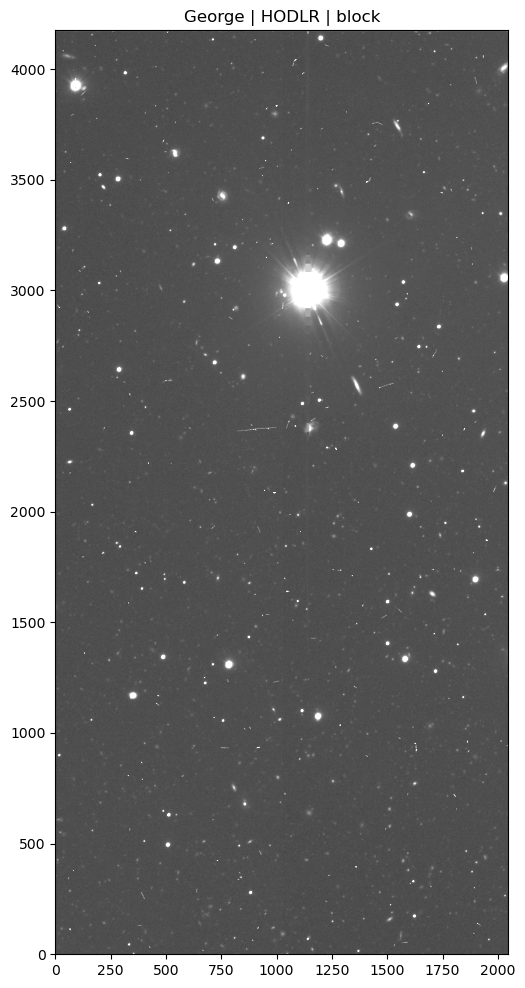

In [3]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='george',
                                          method='block')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('George | HODLR | block')

In [ ]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='gpytorch',
                                          method='block')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('GPyTorch | ExactGP | block')

In [ ]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='treegp',
                                          method='block')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('treegp | Cholesky | block')

 56%|█████▌    | 5/9 [00:00<00:00, 49.05it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))


100%|██████████| 9/9 [00:00<00:00, 20.42it/s]

time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 0.4504


Text(0.5, 1.0, 'George | HODLR | SpanSet')

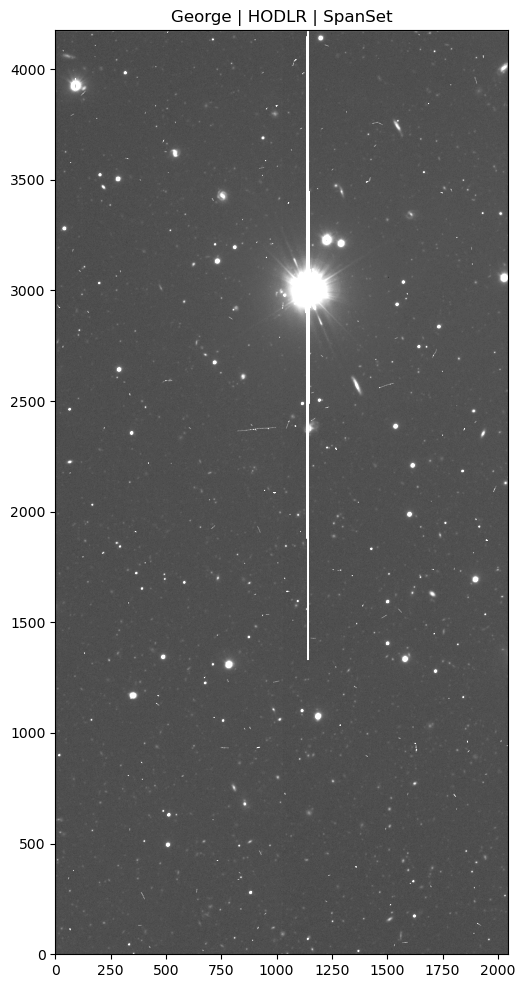

In [4]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='george',
                                          method='spanset')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('George | HODLR | SpanSet')

 22%|██▏       | 2/9 [00:00<00:02,  3.21it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))


100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 3.7185


Text(0.5, 1.0, 'George | HODLR | SpanSet')

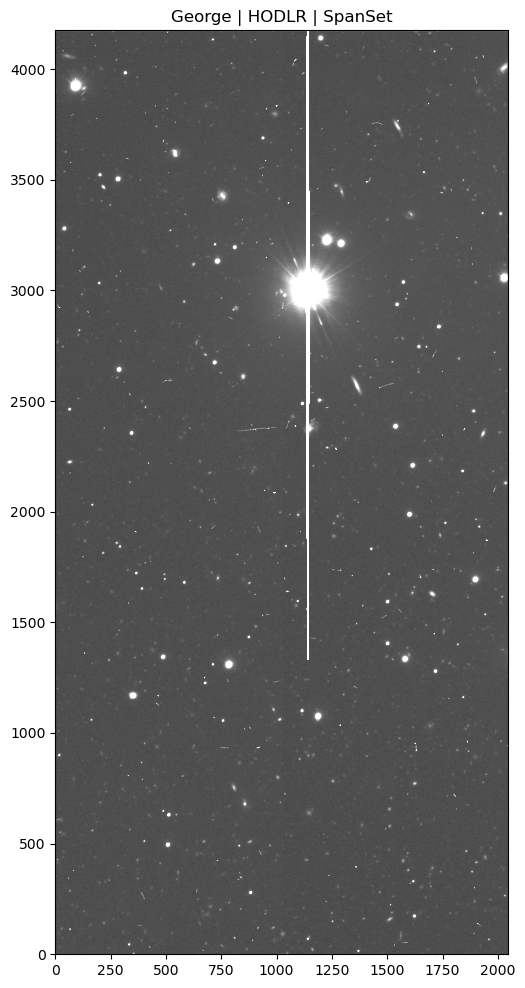

In [5]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='gpytorch',
                                          method='spanset')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('GPyTorch | ExactGP | SpanSet')

 44%|████▍     | 4/9 [00:00<00:00,  5.68it/s]

Problem size is too large to interpolate over. Skipping.
Problem size:  261170
xmin, xmax, ymin, ymax:  1096 1187 1305 4175
bbox:  (minimum=(1096, 1305), maximum=(1187, 4200))


100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

time for InterpolateOverDefectGaussianProcess.interpolate_over_defects = 4.1426


Text(0.5, 1.0, 'treegp | Cholesky | SpanSet')

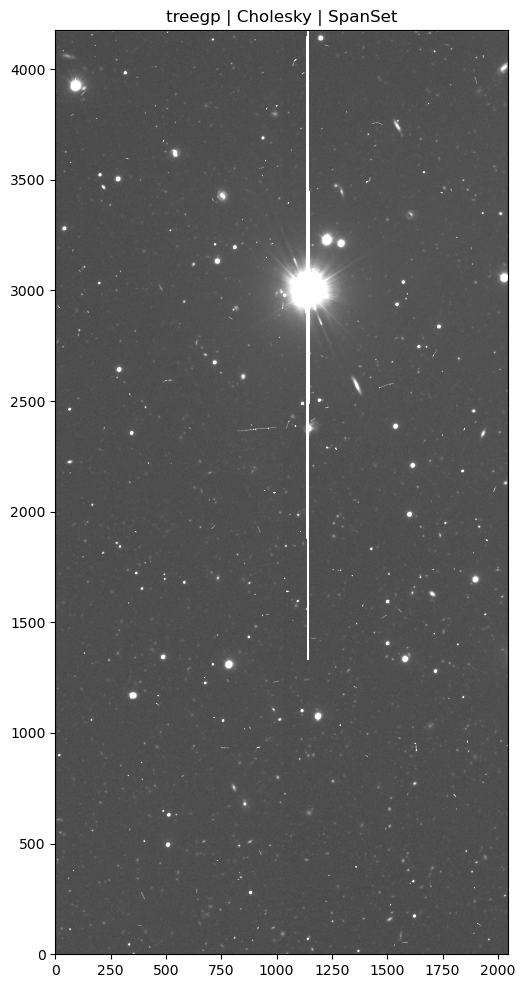

In [6]:
to_interpolate = copy.deepcopy(maskedImage)
GP = InterpolateOverDefectGaussianProcess(to_interpolate, defects=["SAT"],
                                          fwhm=5, block_size=40, solver='treegp',
                                          method='spanset')
GP.interpolate_over_defects()

plt.figure(figsize=(12, 12))
plt.imshow(GP.maskedImage.getImage().array, vmin=400, vmax=800, cmap=plt.cm.Greys_r)
plt.gca().invert_yaxis()
plt.title('treegp | Cholesky | SpanSet')